In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './data/'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [10]:
app_train['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [11]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
app_train.groupby('CODE_GENDER')['AMT_INCOME_TOTAL'].mean()

CODE_GENDER
F      156032.309247
M      193396.482153
XNA    186750.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [18]:
app_train.groupby('CODE_GENDER')['AMT_INCOME_TOTAL'].std()

CODE_GENDER
F      274825.592570
M      134597.169531
XNA     50445.515162
Name: AMT_INCOME_TOTAL, dtype: float64

In [23]:
gender_means, gender_std = app_train.groupby('CODE_GENDER')['AMT_INCOME_TOTAL'].mean(), app_train.groupby('CODE_GENDER')['AMT_INCOME_TOTAL'].std()

In [38]:
ind = np.arange(len(gender_means))  # the x locations for the groups
width = 0.35  # the width of the bars

In [36]:
ind

array([0, 1, 2])

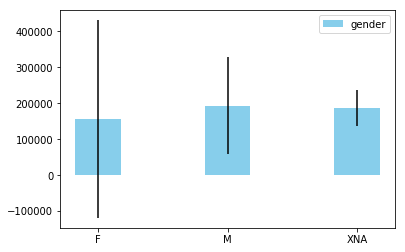

In [43]:
fig, ax = plt.subplots()
rects1 = ax.bar(ind, gender_means, width, yerr=gender_std,
                color='SkyBlue', label='gender')

ax.set_xticks(ind)
ax.set_xticklabels(('F', 'M', 'XNA'))
ax.legend()

plt.show()

In [72]:
def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = round(rect.get_height(),) #取小數點第一位
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')



#rect.get_height()

In [71]:
round(rects1[0].get_height(), 2)

156032.31

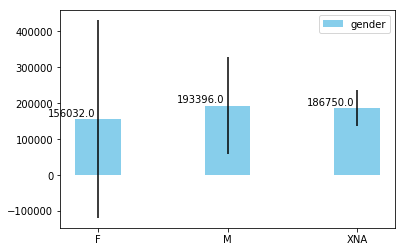

In [86]:
fig, ax = plt.subplots()
rects1 = ax.bar(ind, gender_means, width, yerr=gender_std,
                color='SkyBlue', label='gender')

ax.set_xticks(ind)
ax.set_xticklabels(('F', 'M', 'XNA'))
ax.legend()


autolabel(rects1, "left")

#plt.ylim(0, 400000)
plt.show()